# Title: Make_cmatrix
### Author: Mathieu Giguere

Brief: Uses the output of a machine learning model to make a confusion matrix.

Preconditions: Needs '_results.csv'

### Importing modules and packages

In [1]:
import pandas as pd
import numpy as np
np.bool = np.bool_
np.int = np.int_
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['svg.fonttype'] = 'none'
import seaborn as sns
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, roc_auc_score, matthews_corrcoef, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import glob
import os

### Specify parameters

In [2]:
drug = 'micafungin' # choices are : 'caspofungin', 'anidulafungin', 'micafungin'
strain = 'BY4741' # currently only supports 'BY4741'
locus = 'FKS1-HS1' # currently only supports 'FKS1-HS1' and 'FKS1-HS2'
assay = 'mardy' # choices are : 'orthologs', 'mardy'

### Specify paths

In [3]:
outpath = f'{strain}_{locus}/'
ML_data_path = f'{outpath}/{drug}_ML_{assay}_results.csv'

### Read the ML output file.

In [4]:
df = pd.read_csv(ML_data_path)

y_test = df['y_test'].tolist()

y_pred = df['y_pred'].tolist()

In [5]:
accuracy = balanced_accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Matthews correlation coefficient
mat = matthews_corrcoef(y_test, y_pred)
print("Mat:", mat)

Accuracy: 0.624113475177305
Mat: 0.2756589232099856


### Create the confusion matrix

In [6]:
cmatrix = confusion_matrix(y_test, y_pred)

cmatrix

array([[43,  4],
       [ 6,  3]], dtype=int64)

### Plot Confusion Matrix

C:\Users\duran\AppData\Local\Temp\ipykernel_21032\1082830957.py:22: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


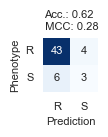

In [7]:
# Display the confusion matrix using seaborn heatmap
sns.set(rc = {'figure.figsize':(.7,.7),
              'font.family':'Arial',
              'font.size':8,
              'legend.title_fontsize':8, 'legend.fontsize':8,
              'axes.labelsize':8,'axes.titlesize':8,
              'xtick.labelsize':8, 'ytick.labelsize':8,
              'xtick.major.pad':1, 'ytick.major.pad':1,
             },
       style='whitegrid')

sns.heatmap(cmatrix, annot=True, fmt='d',
            cmap='Blues', cbar=False,
            xticklabels=['R', 'S'],
            yticklabels=['R', 'S'],
            annot_kws={"size": 8})
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.xlabel('Prediction')
plt.ylabel('Phenotype')
plt.title(f'Acc.: {accuracy:.2f} \n MCC: {mat:.2f}')
plt.tight_layout()

plt.savefig(f'{outpath}/{assay}_{drug}_Confmatrix.svg', format='svg', dpi=300)